[View in Colaboratory](https://colab.research.google.com/github/alvarogg777/colabCompression/blob/master/Compress_Lab3.ipynb)

In [1]:
!pip install gitpython #comment this after run
import git
from matplotlib import pyplot as plt
import numpy as np
link_repo='https://github.com/alvarogg777/colabCompression.git'
repo = git.Repo.clone_from(link_repo,'/content/colabCompression')
!mv colabCompression/*.ipynb . && rm -r colabCompression && jupyter nbconvert --to script *.ipynb && mv Compress_Lab1.txt lab1.py && mv Compress_Lab2.txt lab2.py && rm *.ipynb && ls

    100% |████████████████████████████████| 450kB 8.7MB/s 
    100% |████████████████████████████████| 71kB 16.1MB/s 
[NbConvertApp] Converting notebook Compress_Lab1.ipynb to script
[NbConvertApp] Writing 2985 bytes to Compress_Lab1.txt
[NbConvertApp] Converting notebook Compress_Lab2.ipynb to script
[NbConvertApp] Writing 4417 bytes to Compress_Lab2.txt
lab1.py  lab2.py  sample_data


{1: 107.86183166503906, 2: 99.44277572631836, 3: 62.00522994995117, 4: 16.414287567138672, 5: 4.416584014892578, 6: 1.29937744140625, 7: 0.4943084716796875, 8: 0.4943122863769531} 8
1
(512, 512)
(512, 512)
2
(256, 256)
(256, 256)
3
(170, 170)
(170, 170)
(512, 512)
(256, 256)
(128, 128)
(64, 64)
(32, 32)


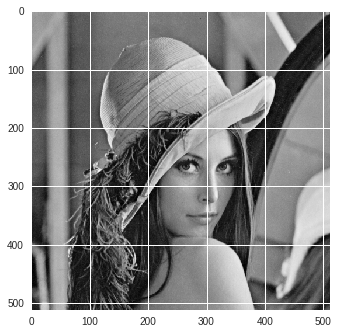

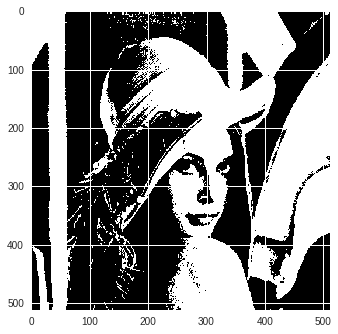

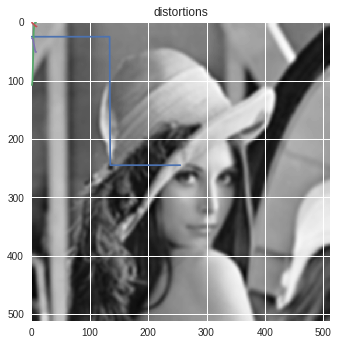

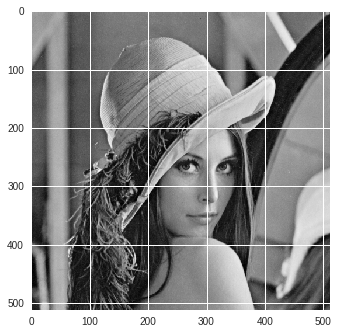

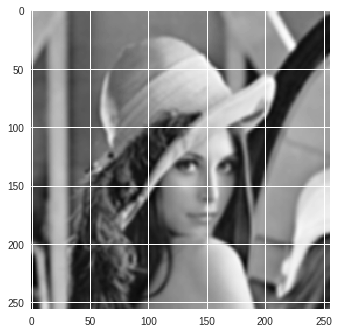

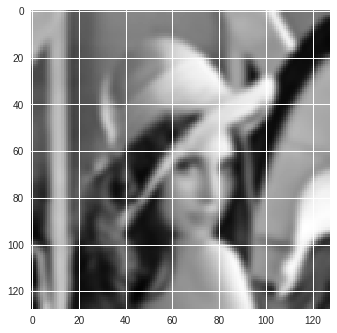

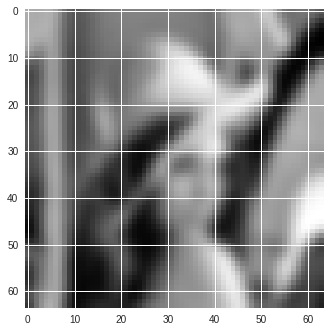

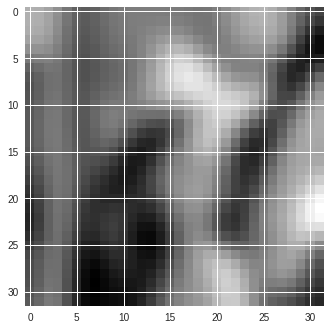

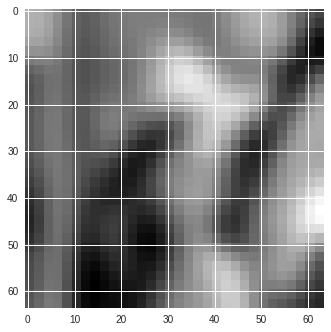

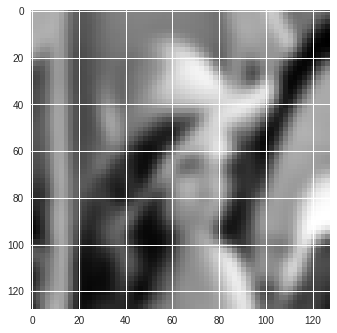

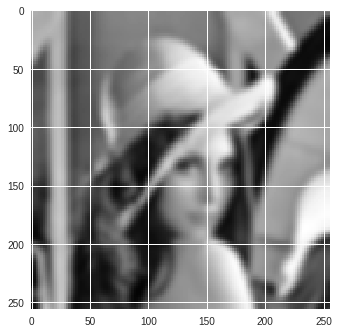

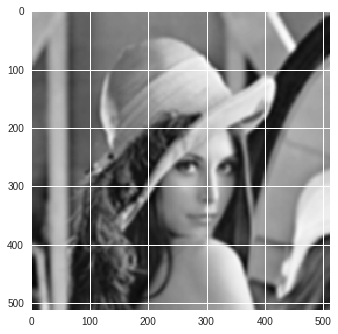

In [2]:
import lab1, lab2

1
(512, 512)
(512, 512)
2
(256, 256)
(256, 256)


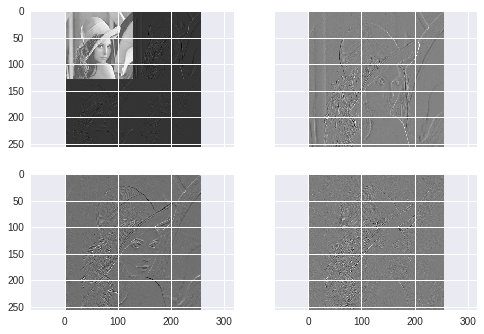

In [3]:
haarLena=lab2.haar_multilevel(lab2.lena,2)
ll2 = haarLena[0:128,0:128]
lh2 = haarLena[0:128,128:256]
hl2 = haarLena[128:256,0:128]
hh2 = haarLena[128:256,128:256]
lh1 = haarLena[0:256,256:512]
hl1 = haarLena[256:512,0:256]
hh1 = haarLena[256:512,256:512]
f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,frameon=False,sharex=True,sharey=True)
ax1.imshow(haarLena[0:256,0:256],cmap='gray')#([ll2+lh2],[hl2+hh2])
ax2.imshow(lh1,cmap='gray')
ax3.imshow(hl1,cmap='gray')
ax4.imshow(hh1,cmap='gray')

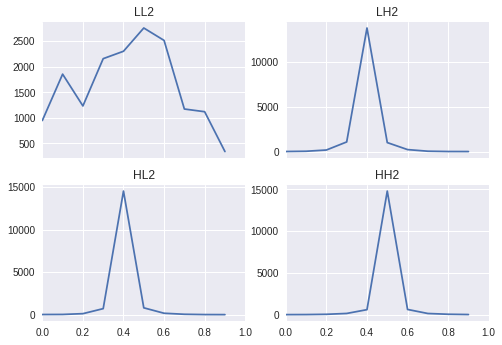

In [4]:
def normalize(input_matrix):
  scale=lambda x: (x-np.min(input_matrix))/(np.max(input_matrix)-np.min(input_matrix))
  return scale(input_matrix)
# count,bins=np.histogram(normalize(ll2))
# plt.xlim([0,1])
# plt.plot(bins[:-1],count)
f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,frameon=False,sharex=True,sharey=False)
# ax1.xlim([0,1])
ax1.set_title('LL2')
ax1.set_xlim([0,1])
count,bins=np.histogram(normalize(ll2))
ax1.plot(bins[:-1],count)

ax2.set_title('LH2')
ax2.set_xlim([0,1])
count,bins=np.histogram(normalize(lh2))
ax2.plot(bins[:-1],count)

ax3.set_title('HL2')
ax3.set_xlim([0,1])
count,bins=np.histogram(normalize(hl2))
ax3.plot(bins[:-1],count)

ax4.set_title('HH2')
ax4.set_xlim([0,1])
count,bins=np.histogram(normalize(hh2))
ax4.plot(bins[:-1],count)

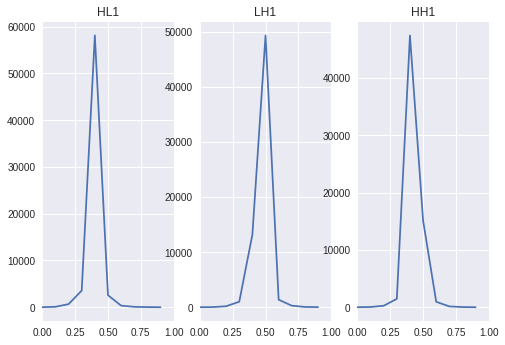

In [5]:
f,((ax1,ax2,ax3))=plt.subplots(1,3,frameon=False,sharex=True,sharey=False)
ax1.set_title('HL1')
ax1.set_xlim([0,1])
count,bins=np.histogram(normalize(hl1))
ax1.plot(bins[:-1],count)

ax2.set_title('LH1')
ax2.set_xlim([0,1])
count,bins=np.histogram(normalize(lh1))
ax2.plot(bins[:-1],count)

ax3.set_title('HH1')
ax3.set_xlim([0,1])
count,bins=np.histogram(normalize(hh1))
ax3.plot(bins[:-1],count)

So having a look at the normal distributions ranging between 0 and 1, we see that closer subbands to the low frequency subband have more values than the farther ones, and the low frequency lowbband LL2 keeps closely the original image distribution. 

A non-uniform scalar quantizer may suit more fancy for quantizing the subbands as we should have more quantization steps on values closer to the center of their distribuitions. However, since we don't have one we'll stick the linear scalar quantizater.

Thus, keeping in mind to have more quantization steps on higher dispersions, we have chosen 7 bits to quantize HL2 and LH2, 6 to HH2,  5 to HL1 and LH1, and 4 to HH1.

In [6]:
lh2.shape

(128, 128)

In [0]:
lh2_q=lab1.quantizer(lh2,7)[0]
hl2_q=lab1.quantizer(hl2,7)[0]
hh2_q=lab1.quantizer(hh2,6)[0]
lh1_q=lab1.quantizer(lh1,5)[0]
hl1_q=lab1.quantizer(hl1,5)[0]
hh1_q=lab1.quantizer(hh1,4)[0]


In [0]:
sh_ll2=lab1.shannonEntropy(ll2)
sh_ll2_q=sh_ll2
sh_lh2=lab1.shannonEntropy(lh2)
sh_lh2_q=lab1.shannonEntropy(lh2_q)
sh_hl2=lab1.shannonEntropy(hl2)
sh_hl2_q=lab1.shannonEntropy(hl2)
sh_hh2=lab1.shannonEntropy(hh2)
sh_hh2_q=lab1.shannonEntropy(hh2_q)
sh_lh1=lab1.shannonEntropy(lh1)
sh_lh1_q=lab1.shannonEntropy(lh1_q)
sh_lh1=lab1.shannonEntropy(hl1)
sh_lh1_q=lab1.shannonEntropy(hl1_q)
sh_hh1=lab1.shannonEntropy(hh1)


In [0]:
lena_q=np.copy(haarLena)
lena_q[0:128,0:128]=ll2
lena_q[0:128,128:256]=lh2_q 
lena_q[128:256,0:128]=hl2_q 
lena_q[128:256,128:256]=hh2_q 
lena_q[0:256,256:512]=lh1_q 
lena_q[256:512,0:256]=hl1_q 
lena_q[256:512,256:512]=hh1_q 

In [0]:
sh_lena_q=lab1.shannonEntropy(lena_q)
sh_lena=lab1.shannonEntropy(haarLena)

In [0]:
entropies=np.transpose(np.array([sh_ll2,sh_lh2,sh_hl2,sh_hh2,sh_lena,
          sh_ll2_q,sh_lh2_q,sh_hl2_q,sh_hh2_q,sh_lena_q]))

In [12]:
len(entropies)

10

In [0]:
compressRates = 8/entropies#the original image has 8 bit representation

In [14]:
compressRates

array([1.08267736, 2.062249  , 2.62331561, 3.35130384, 1.15563139,
       1.08267736, 2.30487198, 2.62331561, 4.07489687, 2.4444794 ])

In [0]:
lena_dq=np.zeros(lab2.lena.shape)
lena_dq[0:128,0:128]=lena_q[0:128,0:128]
lena_dq[0:128,128:256]=lab1.dequantizer(lena_q[0:128,128:256],7,8)
lena_dq[128:256,0:128]=lab1.dequantizer(lena_q[128:256,0:128],7,8)
lena_dq[128:256,128:256]=lab1.dequantizer(lena_q[128:256,128:256],6,8)
lena_dq[0:256,256:512]=lab1.dequantizer(lena_q[0:256,256:512],5,8)
lena_dq[256:512,0:256]=lab1.dequantizer(lena_q[256:512,0:256],5,8)
lena_dq[256:512,256:512]=lab1.dequantizer(lena_q[256:512,256:512],4,8)

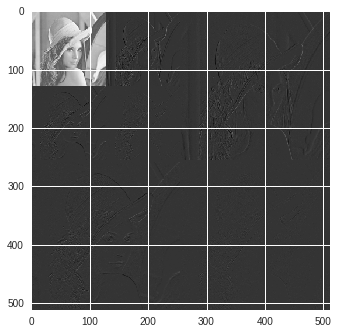

In [16]:
plt.imshow(haarLena,cmap='gray')

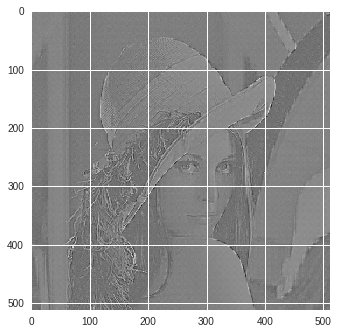

In [17]:
revHaar=lab2.reverse_haar_multilevel(lena_dq,2)
plt.imshow(revHaar,cmap='gray')

In [18]:
from sklearn.metrics import mean_squared_error as mse
MSE=mse(lab2.lena,revHaar)
PSNR= 10 * np.log10((255^2)/MSE)
print(PSNR)

-9.864743020618148
